In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import GridSearchCV


import gc #Trash Collection
import re #Regular Expression
import joblib #Export Pre-Processor/Model 

# Load datasets

In [46]:
#Train Dataset
train = pd.read_csv('application_train.csv')
print(train.shape)
train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
#Test Dataset
test = pd.read_csv('application_test.csv')
print(test.shape)
test.head()

(48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#filling missing values
def fill_missing_values():

    train = train.fillna(0, inplace=True)
    test = test.fillna(0, inplace=True)
    return train, test


In [49]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# one-hot encoding of categorical variables
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    df["new_columns"] = df[new_columns].sum(axis=1)
    return df, new_columns

train, cat_cols = one_hot_encoder(train)
test, cat_cols = one_hot_encoder(test)


    


   

In [51]:
# Dropping all columns with more than % 80 missing data
def drop_missing_columns(df, threshold=0.8):
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0]
    missing_data = missing_data.sort_values(ascending=False)
    missing_data = missing_data[missing_data > threshold * df.shape[0]]
    df = df.drop(missing_data.index, axis=1)
    return df




In [52]:
train = drop_missing_columns(train)
test = drop_missing_columns(test)


In [53]:
#feature engineering
def feature_engineering(df):
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace = True)
    df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: x/365)
    df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: x*-1)
    df['DAYS_EMPLOYED'].fillna(df['DAYS_EMPLOYED'].mean(), inplace = True)
    df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: x/365)
    df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: x*-1)
    df['DAYS_BIRTH'].fillna(df['DAYS_BIRTH'].mean(), inplace = True)

    df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: x/365)
    df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: x*-1)
    df['DAYS_REGISTRATION'].fillna(df['DAYS_REGISTRATION'].mean(), inplace = True)

    df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: x/365)
    df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: x*-1)
    df['DAYS_ID_PUBLISH'].fillna(df['DAYS_ID_PUBLISH'].mean(), inplace = True)

    df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: x/365)
    df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: x*-1)
    df['DAYS_LAST_PHONE_CHANGE'].fillna(df['DAYS_LAST_PHONE_CHANGE'].mean(), inplace = True)

    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

    return df


In [54]:
train = feature_engineering(train)
test = feature_engineering(test)


In [55]:
test.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan,new_columns,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,52.715068,6.380822,14.164384,...,0,1,0,0,16,0.121044,0.237342,67500.0,0.152300,0.036147
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,49.490411,12.243836,24.980822,...,1,0,0,1,16,0.247398,0.444409,49500.0,0.175455,0.077973
2,100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,54.898630,12.213699,5.958904,...,1,0,0,1,16,0.222477,0.305308,101250.0,0.344578,0.105202
3,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,38.290411,5.112329,5.479452,...,0,1,0,0,16,0.133515,0.200000,78750.0,0.155614,0.031123
4,100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,35.726027,6.002740,10.958904,...,1,0,0,1,16,0.168021,0.287770,60000.0,0.178150,0.051266


In [56]:
# Fill Missing Values for Numerical Columns w/ mean
def fill_missing_values(df):
    for col in df.columns:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64':
            df[col].fillna(df[col].mean(), inplace=True)
    return df

In [57]:
train = fill_missing_values(train)
test = fill_missing_values(test)


In [58]:
train.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan,new_columns,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,25.920548,1.745205,...,0,1,0,0,16,0.067329,0.498036,202500.0,0.121978,0.060749
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,45.931507,3.254795,...,0,1,0,0,16,0.070862,0.208736,135000.0,0.132217,0.027598
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,52.180822,0.616438,...,1,0,0,1,16,0.011814,0.500000,67500.0,0.100000,0.050000
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,52.068493,8.326027,...,1,0,0,1,16,0.159905,0.431748,67500.0,0.219900,0.094941
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,54.608219,8.323288,...,1,0,0,1,16,0.152418,0.236842,121500.0,0.179963,0.042623


# fin du preprocess

In [59]:
# model training


In [60]:
X = train.drop('TARGET', axis=1)
y = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

2022/11/28 15:02:48 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '9b83f319818e42bd92c4aaef43ca13e1', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
c:\Users\chams\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
2022/11/28 15:04:17 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\chams\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be enco

RandomForestClassifier(max_depth=10, random_state=42)

In [62]:
#prediction
y_pred = model.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))


Accuracy of random forest classifier on test set: 0.92


In [63]:
import sklearn.metrics as metrics

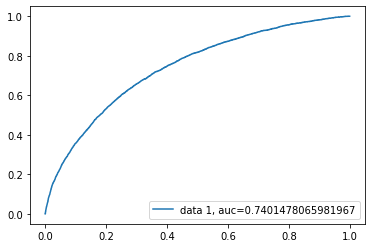

In [64]:
# roc auc score
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [65]:
#save model
import pickle
pickle.dump(model, open('model.pkl','wb'))


In [66]:
#load model
model = pickle.load(open('model.pkl','rb'))


In [67]:
#metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[[56554     0]
 [ 4949     0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.00      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503

0.9195323805342829


c:\Users\chams\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chams\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chams\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

<AxesSubplot: xlabel='feature'>

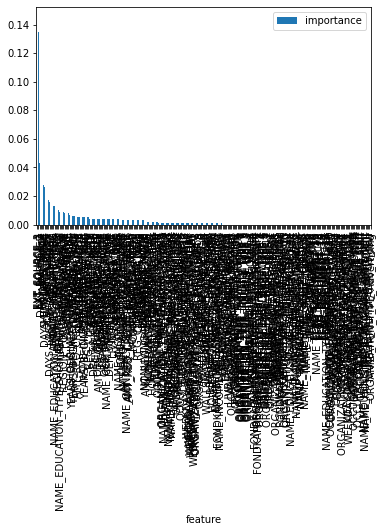

In [68]:
#plot feature importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)
importances.plot.bar()


In [69]:
pip install mlflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\chams\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [70]:
!mlflow

Usage: mlflow [OPTIONS] COMMAND [ARGS]...

Options:
  --version  Show the version and exit.
  --help     Show this message and exit.

Commands:
  artifacts    Upload, list, and download artifacts from an MLflow...
  db           Commands for managing an MLflow tracking database.
  deployments  Deploy MLflow models to custom targets.
  experiments  Manage experiments.
  gc           Permanently delete runs in the `deleted` lifecycle stage.
  models       Deploy MLflow models locally.
  recipes      Run MLflow Recipes and inspect recipe results.
  run          Run an MLflow project from the given URI.
  runs         Manage runs.
  sagemaker    Serve models on SageMaker.
  server       Run the MLflow tracking server.


In [75]:
#mlflow
import mlflow
import mlflow.sklearn

mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("Home Credit Default Risk")

with mlflow.start_run():

    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 10)
    mlflow.log_param("random_state", 42)
    mlflow.log_metric("accuracy", 0.92)
    mlflow.sklearn.log_model(model, "model")




In [74]:
mlflow.end_run()


In [78]:
pip install seaborn

     -------------------------------------- 288.2/288.2 KB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 4.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.1
    Uninstalling matplotlib-3.6.1:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'c:\\users\\chams\\appdata\\local\\programs\\python\\python310\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\Users\chams\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [79]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [82]:
# metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
get_ipython().run_line_magic('matplotlib', 'inline')

# plot feature importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)
importances.plot.bar()

# roc auc score
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()





[[56554     0]
 [ 4949     0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.00      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



c:\Users\chams\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chams\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chams\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

0.9195323805342829


ModuleNotFoundError: No module named 'seaborn'